In [1]:
import numpy
import pandas

import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras import backend as K
K.common.set_image_dim_ordering('th')

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
num_classes

10

In [7]:
# Create the model
#Sequential Neural Network
model = Sequential()
#Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
#Dropout layer at 20%
model.add(Dropout(0.2)) 
#Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
#Max Pool layer with size 2×2
model.add(MaxPooling2D(pool_size=(2, 2))) 
#Flatten layer
model.add(Flatten()) 
#Fully connected layer with 1024 units and a rectifier activation function
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
#Dropout layer at 50%
model.add(Dropout(0.5))
#Fully connected output layer with 10 units and a Softmax activation function, here num_classes value is 10
model.add(Dense(num_classes, activation='softmax'))

In [8]:
# Compile model
epochs = 3
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #Compiling the Model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [9]:
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 225s 4ms/step - loss: 1.7594 - accuracy: 0.3666 - val_loss: 1.4706 - val_accuracy: 0.4754
Epoch 2/3
50000/50000 [==============================] - 226s 5ms/step - loss: 1.4657 - accuracy: 0.4758 - val_loss: 1.3796 - val_accuracy: 0.5148
Epoch 3/3
50000/50000 [==============================] - 226s 5ms/step - loss: 1.3781 - accuracy: 0.5066 - val_loss: 1.3016 - val_accuracy: 0.5416


In [10]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy Before adding layers: %.2f%%" % (scores[1]*100))#Accuracy & loss evaluation

Accuracy Before adding layers: 54.16%


In [11]:
model.save('./model' + '.h5') #Saving the model to .h5

In [12]:
# Create the model
#Sequential Neural Network
model1 = Sequential()
#Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
#Dropout layer at 20%
model1.add(Dropout(0.2))
#Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3))) 
#Max Pool layer with size 2×2
model1.add(MaxPooling2D(pool_size=(2, 2)))
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
#Dropout layer at 20%
model1.add(Dropout(0.2))
#Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
#Max Pool layer with size 2×2
model1.add(MaxPooling2D(pool_size=(2, 2)))
#Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3))) 
#Dropout layer at 20%
model1.add(Dropout(0.2)) 
#Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
#Max Pool layer with size 2×2
model1.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten layer
model1.add(Flatten())
#Dropout layer at 20%
model1.add(Dropout(0.2)) 
#Fully connected layer with 1024 units and a rectifier activation function
model1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model1.add(Dropout(0.2))
# Adding Dense layer with activation function softmax
model1.add(Dense(num_classes, activation='softmax'))

In [13]:
# Compile model
epochs = 3
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [14]:
# Fit the model
history1=model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 456s 9ms/step - loss: 1.9065 - accuracy: 0.2960 - val_loss: 1.6787 - val_accuracy: 0.4012
Epoch 2/3
50000/50000 [==============================] - 454s 9ms/step - loss: 1.5625 - accuracy: 0.4265 - val_loss: 1.4585 - val_accuracy: 0.4732
Epoch 3/3
50000/50000 [==============================] - 453s 9ms/step - loss: 1.4376 - accuracy: 0.4722 - val_loss: 1.3673 - val_accuracy: 0.5109


In [15]:
# Final evaluation of the model
scores1 = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores1[1]*100))

Accuracy: 51.09%


In [16]:
model1.save('./model' + '.h5_1')

# Performance Observation

In [17]:
print("Accuracy Before adding layers: %.2f%%" % (scores[1]*100))
print("Accuracy after adding layers: %.2f%%" % (scores1[1]*100))

Accuracy Before adding layers: 54.16%
Accuracy after adding layers: 51.09%


# 2. predict the first 4 image of the test data. Then, print the actual label for those 4 images

In [ ]:
import pandas as pd
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_test[0:4])):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid
prediction["Label"] = model.predict_classes(X_test[0:4], verbose=0)
print(prediction.head())

import numpy as np
a  = np.array(y_test[0:4])
print('Actual labels for four images: {0}'.format(np.argmax(a, axis=1)))

   ImageId  Label
0        1      3
1        2      1
2        3      8
3        4      8
Actual labels for four images: [3 8 8 0]


# Visualize Loss and Accuracy using the history object

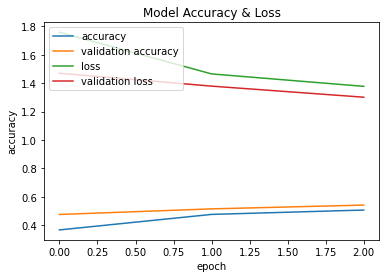

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy & Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','validation loss'], loc='upper left')
plt.show()

# Bonus Question
Program the question 2 using the saved model (.h5 model)


In [ ]:
loaded_model = keras.models.load_model('./model.h5')
import pandas as pd
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_test[0:4])):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid
prediction["Label"] = loaded_model.predict_classes(X_test[0:4], verbose=0)
print(prediction.head())

import numpy as np
a  = np.array(y_test[0:4])
print('Actual labels for first four images: {0}'.format(np.argmax(a, axis=1)))

   ImageId  Label
0        1      3
1        2      1
2        3      8
3        4      8
Actual labels for first four images: [3 8 8 0]
